In [302]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [301]:
# Read the dataset 

autoData = pd.read_csv(r"C:\Users\steve rufin\Desktop\PROJECTS\LEARNING PYTHON\Kaggle\Automobile_data.csv")

autoData

In [57]:
# Make a copy of autoData to be used for manipulation
df = autoData.copy()

In [118]:
# Display df
df

<h3> Check the head of the df
    

In [ ]:
df.head()

<h3>How many rows and Columns are there?

In [60]:
df.shape    
# There are 205 rows and 36 columns

(205, 26)

<h3> What is the average price for all cars in the dataset?

In [89]:
#display all columns
pd.set_option('display.max_columns',26)

In [90]:
# display all rows 
pd.set_option('display.max_rows',205)

In [119]:
#Checking the data type of the column price
df['price'].dtypes

dtype('int32')

In [92]:
# There are rows in the 'Price' column that filled with interrogation mark(?)
df.loc[df['price']=="?"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [ ]:
# Because there are 205 rows and only 4 are filled with ?, we can replace that with 0.
df['price'].replace({"?":"0"}, inplace=True)


In [114]:
#Convert the Price column from string to Integer
df['price']=df['price'].astype(int)
df['price'].dtype

dtype('int32')

In [333]:
# Now we can calculate the average price for all cars
averagePrice = df['price'].mean()
print(f'The average price for all cars is {averagePrice}')

The average price for all cars is 12949.429268292683


<AxesSubplot:xlabel='price'>

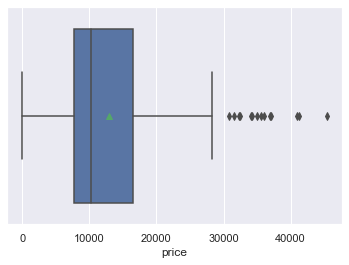

In [331]:
#Visualization using the box plot
sns.boxplot(x=df['price'],showmeans=True)

<h3> What is the cheapest make in the lot

In [370]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500


In [417]:
# We exclude the rows for cars which price value is o
df[df['price']==df[df['price']!=0]['price'].min()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,2,83,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69.0,4900,31,36,5118


In [385]:
print("The cheapest car is the Subaru Hatchbak with a price of 5,118")

The cheapest car is the Alfa-Romeo convertible with a price of 5,118


<AxesSubplot:xlabel='price', ylabel='make'>

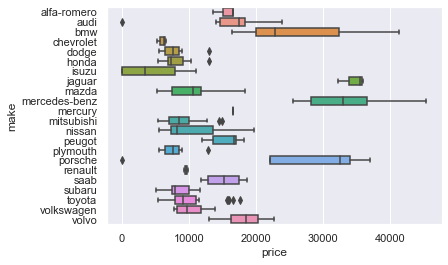

In [398]:
sns.boxplot(x=df['price'],y=df['make'],data=df)

<h3> What is the costliest car

In [411]:
df[df['price']==45400][['make','body-style']]

,make,body-style
74,mercedes-benz,hardtop


<AxesSubplot:xlabel='price', ylabel='make'>

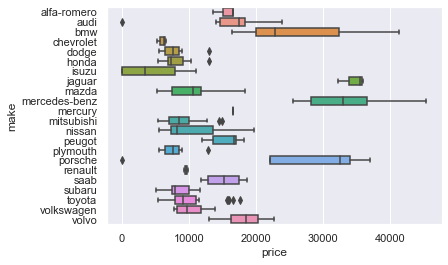

In [405]:
sns.boxplot(x=df['price'],y='make',data=df)

In [400]:
print('The costliest car is the Mercedes-Benz with a price of 45,400')

The costliest car is the Mercedes-Benz with a price of 45,400


<h3> How many cars have a horsepower greater than 100

In [ ]:
df.dtypes
# The horsepower column has a data type of string, so we need to convert it to float before answering the question

In [290]:
# Convert the horsepower column to float data type
df['horsepower']= df[df['horsepower']!='?']['horsepower'].astype(float)

In [291]:
df['horsepower'].dtype

dtype('float64')

In [292]:
# Number of cars with a horsepower greater than 92
df[df['horsepower']>100]['horsepower'].count()

92

In [203]:
print("There are 92 cars with a horsepower greate than 100")

There are 92 cars with a horsepower greate than 100


<h3> What are the 3 most commonly found car in the dataset 

In [248]:
df_car=df.groupby('make')['make']
df_car.count().sort_values(ascending=False)

make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

<AxesSubplot:xlabel='count', ylabel='make'>

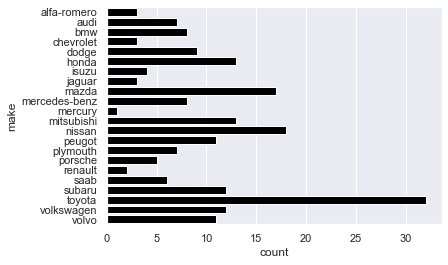

In [315]:
# Using the countplot to visualize the result
sns.set(style='darkgrid')
sns.countplot(y='make',data=df,color='black')

In [250]:
print('Toyota, Nissan and Mazda are the most commonly found cars in the dataset')

Toyota, Nissan and Mazda are the most commonly found cars in the dataset


<h3> Someone purchased a car for 7099, what is the make of the that car?

In [271]:
df[df['price']==7099][['make','price']]

,make,price
90,nissan,7099


In [270]:
print('The make of the car is: Nissan')

The make of the car is: Nissan


<h3> How many hatchback car are in the dataset?

In [433]:
df[df['body-style']=='hatchback']['body-style'].count()

70

In [282]:
print('There are 70 hatchback cars in the dataset')

There are 70 hatchback cars in the dataset


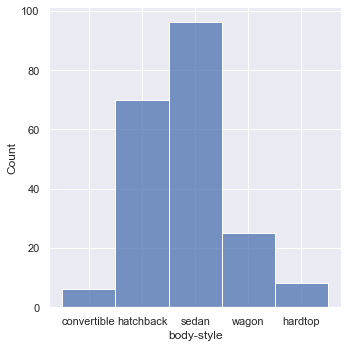

In [438]:
#Visual representation
sns.displot(df['body-style'])

<h3> Which cars are priced greater than 40000?
    

In [286]:
df[df['price']>40000][['make','price']]

,make,price
16,bmw,41315
73,mercedes-benz,40960
74,mercedes-benz,45400


In [285]:
print('There are 3 cars priced greater than 40000, 2 Mercedes-Benz and 1 BMW')

There are 3 cars priced greater than 40000, 2 Mercedes-Benz and 1 BMW


<h3> Which are the cars that are both Sedan and Priced greater than 5000?

In [293]:
df[(df['price']>5000)&(df['body-style']=='sedan')][['make','body-style','price']]

,make,body-style,price
3,audi,sedan,13950
4,audi,sedan,17450
5,audi,sedan,15250
6,audi,sedan,17710
8,audi,sedan,23875
10,bmw,sedan,16430
11,bmw,sedan,16925
12,bmw,sedan,20970
13,bmw,sedan,21105
14,bmw,sedan,24565
